
## Data investigation

* Importing our libraries



In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 

* Reading the dataset

In [2]:
dt = pd.read_csv('data/auto.csv')
dt.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23


* Reading the info in our dataset


In [3]:
#Accessing our dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [17]:
#describing our data

dt.describe()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,4.941600,11.509200,29.270000
std,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,3.000000,6.000000,14.000000
50%,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,5.000000,11.000000,29.000000
75%,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,7.000000,18.000000,44.000000
max,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,9.000000,23.000000,59.000000


In [21]:
dt.shape

(5000, 17)

## Validating
* Dropping irrelevant columns

In [4]:
#According to our dataset our irrelevant columns are
# address, Geo point, Displayed comment,publicname, scheduled at, year,month
dt.drop(['Address','Geo point','Displayed comment','Public name','year','month','Scheduled at'], axis=1, inplace=True)

dt.head() 

## displayed comment and scheduled at have been dropped bc they have missing values

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,Subscription status,day,hour,minute
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23


* Fixing syntax errors

In [5]:
#Let's remove use the str.strip function on the respective column name to strip the leading and trailing space 
# Also remove white spaces and convert the column names to lower case

dt.columns = dt.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dt.tail(15)

,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
4985,2,2,0,0,1,operational,Paris,paris-mithouard-6,STATION,75007,operational,4,station,ok,nonexistent,4,2,35
4986,3,3,0,0,0,nonexistent,Alfortville,alfortville-charlesdegaulle-16,STATION,94140,operational,3,station,ok,nonexistent,3,4,3
4987,6,6,0,0,0,nonexistent,Boulogne-Billancourt,boulognebillancourt-abelgance-6,STATION,92100,operational,0,station,ok,nonexistent,8,6,41
4988,5,5,0,0,1,operational,Paris,paris-ramey-62,STATION,75018,operational,1,station,ok,nonexistent,8,11,0
4989,4,4,0,0,0,operational,Saint-MandÃ©,saintmande-mongenot-3,STATION,94160,operational,0,station,ok,nonexistent,6,7,28
4990,0,0,0,0,0,operational,Paris,paris-hopital-47,STATION,75013,operational,4,station,ok,nonexistent,3,21,13
4991,5,5,0,0,0,nonexistent,CrÃ©teil,creteil-marechaldelattredetassigny-56,STATION,94000,operational,1,station,ok,nonexistent,7,20,43
4992,0,0,0,0,2,operational,Paris,paris-ivry-3,STATION,75013,operational,6,station,ok,nonexistent,9,23,1
4993,6,6,0,0,0,nonexistent,Le Plessis-Robinson,leplessisrobinson-charlesdegaulle-6,STATION,92350,operational,0,station,ok,nonexistent,2,4,43
4994,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,75010,operational,1,station,ok,nonexistent,1,20,49


# Fixing typos
* Data Cleaning Action: No action taken
* Explanation: There were no typos

# Accuracy

In [6]:
#Compare columns with car and bluecar
# If they equal to each other  we can now drop cars column
dt['cars'].equals(dt['bluecar_counter'])

True

In [7]:
dt.drop(['cars'], axis=1, inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bluecar_counter      5000 non-null   int64 
 1   utilib_counter       5000 non-null   int64 
 2   utilib_1.4_counter   5000 non-null   int64 
 3   charge_slots         5000 non-null   int64 
 4   charging_status      5000 non-null   object
 5   city                 5000 non-null   object
 6   id                   5000 non-null   object
 7   kind                 5000 non-null   object
 8   postal_code          5000 non-null   int64 
 9   rental_status        5000 non-null   object
 10  slots                5000 non-null   int64 
 11  station_type         5000 non-null   object
 12  status               5000 non-null   object
 13  subscription_status  5000 non-null   object
 14  day                  5000 non-null   int64 
 15  hour                 5000 non-null   int64 
 16  minute

# Completeness
* checking for null values
* dropping missing values

In [8]:
#Checking the missing values in our dataset

dt.isnull().any()

bluecar_counter        False
utilib_counter         False
utilib_1.4_counter     False
charge_slots           False
charging_status        False
city                   False
id                     False
kind                   False
postal_code            False
rental_status          False
slots                  False
station_type           False
status                 False
subscription_status    False
day                    False
hour                   False
minute                 False
dtype: bool

<AxesSubplot:xlabel='hour'>

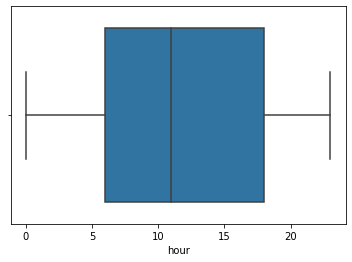

In [9]:
# To cross check there are no missing values
# we can use outliers
# we can discover outliers using data visualization tools

#First import seaborn library
import seaborn as sns

#Plot the boxplot using one column .On this case we used bluecar_counter
sns.boxplot(x=dt['hour'])

In [10]:
Q1 = dt.quantile(0.25)
Q3 = dt.quantile(0.75)

IQR = Q3 - Q1

(dt < (Q1 - 1.5 * IQR)) |(dt > (Q3 + 1.5 * IQR))


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the data
#does not seem to have outliers.
# This is due to the range of each column.

# Autolib_no_outlier = Electric[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis = 1)]

# print(Autolib_no_outlier)

,bluecar_counter,charge_slots,charging_status,city,day,hour,id,kind,minute,postal_code,rental_status,slots,station_type,status,subscription_status,utilib_1.4_counter,utilib_counter
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Consitency
* Checking for duplicates

In [11]:
# Duplicates are data points that are repeated in our dataset. 
# These should be simply removed.
#To check if our dataset has duplicate values, we use the duplicated function
dt.duplicated().sum()

#There are zero duplicates

#Data Cleaning Action: No action taken
#Explanation: There were no typos

0

# Uniformity
* Standardization - Renaming column names
* Fixing messy column names
* Date Type Conversion

In [12]:
dt.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter',
       'charge_slots', 'charging_status', 'city', 'id', 'kind', 'postal_code',
       'rental_status', 'slots', 'station_type', 'status',
       'subscription_status', 'day', 'hour', 'minute'],
      dtype='object')

In [13]:
# according to the data set description 
# station name is also id
dt = dt.rename({'id': 'Station Name'}, axis='columns')
dt.head()


,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,Station Name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23


In [14]:
# Filtering of data
#  for final data set
#filtering out the operational data we do not need the broken ones.


dt1 = dt[dt.rental_status == 'operational']
dt.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,Station Name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute
0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43
1,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24
2,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14
3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37
4,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23


In [15]:
#checking out the info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bluecar_counter      5000 non-null   int64 
 1   utilib_counter       5000 non-null   int64 
 2   utilib_1.4_counter   5000 non-null   int64 
 3   charge_slots         5000 non-null   int64 
 4   charging_status      5000 non-null   object
 5   city                 5000 non-null   object
 6   Station Name         5000 non-null   object
 7   kind                 5000 non-null   object
 8   postal_code          5000 non-null   int64 
 9   rental_status        5000 non-null   object
 10  slots                5000 non-null   int64 
 11  station_type         5000 non-null   object
 12  status               5000 non-null   object
 13  subscription_status  5000 non-null   object
 14  day                  5000 non-null   int64 
 15  hour                 5000 non-null   int64 
 16  minute

# Exporting the cleaned data set

In [ ]:
# export to clean

dataclean = dt1.to_csv('dataclean')



In [16]:
#reading the csv file
cars = pd.read_csv('data/dataclean', encoding = 'utf8')
cars.head()

,Unnamed: 0,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute,date
0,0,0,0,0,0,nonexistent,Paris,paris/suffren/2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43,8
1,1,6,0,0,0,operational,Paris,paris/raymondlosserand/145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24,6
2,2,3,0,2,0,operational,Le Bourget,lebourget/johnfitzgeraldkennedy/2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14,3
3,3,3,1,0,1,operational,Paris,paris/eugeneoudine/51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37,4
4,4,3,0,0,0,nonexistent,Paris,paris/portedechamperret/6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23,8


In [24]:
#our new clean file adopted the index of the previous one
cars.drop(['Unnamed: 0'], axis=1, inplace=True)


In [25]:
cars.head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute,date
0,0,0,0,0,nonexistent,Paris,paris/suffren/2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43,8
1,6,0,0,0,operational,Paris,paris/raymondlosserand/145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24,6
2,3,0,2,0,operational,Le Bourget,lebourget/johnfitzgeraldkennedy/2,STATION,93350,operational,1,station,ok,nonexistent,3,20,14,3
3,3,1,0,1,operational,Paris,paris/eugeneoudine/51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37,4
4,3,0,0,0,nonexistent,Paris,paris/portedechamperret/6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23,8


In [26]:
cars.shape

(4618, 18)

In [27]:
cars.describe()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,postal_code,slots,day,hour,minute,date
count,4618.000000,4618.00000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000,4618.000000
mean,2.526635,0.06453,0.133175,0.274361,82527.600043,2.092248,4.939801,11.521871,29.378302,4.939801
std,1.999308,0.25608,0.369130,0.563373,8813.323677,1.896425,2.595429,6.883012,17.232702,2.595429
min,0.000000,0.00000,0.000000,0.000000,75001.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.00000,0.000000,0.000000,75012.000000,0.000000,3.000000,6.000000,15.000000,3.000000
50%,2.000000,0.00000,0.000000,0.000000,75019.000000,2.000000,5.000000,12.000000,29.000000,5.000000
75%,4.000000,0.00000,0.000000,0.000000,92310.000000,4.000000,7.000000,17.750000,44.000000,7.000000
max,7.000000,2.00000,3.000000,2.000000,95880.000000,7.000000,9.000000,23.000000,59.000000,9.000000


bluecar_counter        False
utilib_counter         False
utilib_1.4_counter     False
charge_slots           False
charging_status        False
city                   False
station_name           False
kind                   False
postal_code            False
rental_status          False
slots                  False
station_type           False
status                 False
subscription_status    False
day                    False
hour                   False
minute                 False
date                   False
dtype: bool


# Answering questions
# Question 1
* Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

In [30]:

#The most popular hour of the day for picking up a shared blue electric car in the city of paris in the month of april 2018
#First filter to only paris 

carsparis = cars[cars['city'] == 'Paris']
carsparis.head(20)

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute,date
0,0,0,0,0,nonexistent,Paris,paris/suffren/2,STATION,75015,operational,2,station,ok,nonexistent,8,11,43,8
1,6,0,0,0,operational,Paris,paris/raymondlosserand/145,STATION,75014,operational,0,station,ok,nonexistent,6,7,24,6
3,3,1,0,1,operational,Paris,paris/eugeneoudine/51,STATION,75013,operational,2,station,ok,nonexistent,4,4,37,4
4,3,0,0,0,nonexistent,Paris,paris/portedechamperret/6,PARKING,75017,operational,3,station,ok,nonexistent,8,17,23,8
5,0,0,0,0,nonexistent,Paris,paris/voltaire/8,STATION,75011,operational,4,station,ok,nonexistent,6,7,2,6
7,1,0,0,0,nonexistent,Paris,paris/jeanmoulin/34,STATION,75014,operational,4,station,ok,nonexistent,2,22,58,2
8,6,0,0,0,nonexistent,Paris,paris/anvers/parking,PARKING,75009,operational,0,station,ok,nonexistent,4,15,2,4
9,0,0,0,2,operational,Paris,paris/censier/14,STATION,75005,operational,6,station,ok,nonexistent,1,4,39,1
11,5,1,0,0,nonexistent,Paris,paris/portedechamperret/6,PARKING,75017,operational,0,station,ok,nonexistent,5,12,22,5
12,0,0,0,0,nonexistent,Paris,paris/jeanmoulin/34,STATION,75014,operational,0,station,ok,nonexistent,8,21,54,8


In [31]:

#creating a copy
dfparis = carsparis
#grouping 
dfparis = dfparis.groupby(['station_name','day','hour']).sum()
dfparis.head(20)

bluecar_counter  utilib_counter  \
station_name         day hour                                    
paris/25aout1944/8   1   18                  1               0   
                     2   7                   4               0   
                         12                  2               0   
                     4   3                   3               0   
                         18                  1               0   
                     7   21                  1               0   
                     9   5                   0               0   
                         20                  1               0   
paris/adolphemax/6   2   11                  4               0   
                     7   16                  0               0   
                     8   13                  0               0   
paris/adolphemille/8 1   1                   1               0   
                     3   12                  2               0   
                         21                  4               0   
                     4   18                  2               0   
                     8   1                   0               0   
                     9   0                   1               0   
paris/adolpheyvon/6  1   20                  4               0   
                     2   14                  5               0   
                         19                  5               0   

                               utilib_1.4_counter  charge_slots  postal_code  \
station_name         day hour                                                  
paris/25aout1944/8   1   18                     0             0        75014   
                     2   7                      0             0        75014   
                         12                     0             0        75014   
                     4   3                      0             0        75014   
                         18                     0             0        75014   
                     7   21                     1             0        75014   
                     9   5                      0             0        75014   
                         20                     1             0        75014   
paris/adolphemax/6   2   11                     0             0        75009   
                     7   16                     0             0        75009   
                     8   13                     0             0        75009   
paris/adolphemille/8 1   1                      0             0        75019   
                     3   12                     0             0        75019   
                         21                     0             0        75019   
                     4   18                     1             0        75019   
                     8   1                      0             1        75019   
                     9   0                      0             2       150038   
paris/adolpheyvon/6  1   20                     0             1        75016   
                     2   14                     0             0        75016   
                         19                     0             0        75016   

                               slots  minute  date  
station_name         day hour                       
paris/25aout1944/8   1   18        2      40     1  
                     2   7         0      37     2  
                         12        1      49     2  
                     4   3         0      10     4  
                         18        1      48     4  
                     7   21        1      18     7  
                     9   5         3      23     9  
                         20        1      53     9  
paris/adolphemax/6   2   11        0       1     2  
                     7   16        3      47     7  
                     8   13        4      56     8  
paris/adolphemille/8 1   1         1      53     1  
                     3   12        1      25     3  
                      

In [32]:
#Group by hour to find the most used bluecars
# Positive values mean cars wwere returned 
#  Negative values  means cars picked
#The most popular hour is 21. It has the highest positive value
dfparis['rental_hour'] = dfparis.groupby('station_name')['bluecar_counter'].diff().fillna(0)


In [33]:
dfparis

bluecar_counter  utilib_counter  \
station_name       day hour                                    
paris/25aout1944/8 1   18                  1               0   
                   2   7                   4               0   
                       12                  2               0   
                   4   3                   3               0   
                       18                  1               0   
...                                      ...             ...   
paris/vulpian/24   8   22                  3               0   
                   9   12                  1               0   
                       23                  2               0   
paris/wagram/77    5   20                  0               0   
                   6   0                   2               0   

                             utilib_1.4_counter  charge_slots  postal_code  \
station_name       day hour                                                  
paris/25aout1944/8 1   18                     0             0        75014   
                   2   7                      0             0        75014   
                       12                     0             0        75014   
                   4   3                      0             0        75014   
                       18                     0             0        75014   
...                                         ...           ...          ...   
paris/vulpian/24   8   22                     0             1        75013   
                   9   12                     0             1        75013   
                       23                     0             1        75013   
paris/wagram/77    5   20                     1             0        75017   
                   6   0                      0             0        75017   

                             slots  minute  date  rental_hour  
station_name       day hour                                    
paris/25aout1944/8 1   18        2      40     1          0.0  
                   2   7         0      37     2          3.0  
                       12        1      49     2         -2.0  
                   4   3         0      10     4          1.0  
                       18        1      48     4         -2.0  
...                            ...     ...   ...          ...  
paris/vulpian/24   8   22        2      24     8          2.0  
                   9   12        4      58     9         -2.0  
                       23        4      32     9          1.0  
paris/wagram/77    5   20        0      24     5          0.0  
                   6   0         2       7     6          2.0  

[2602 rows x 9 columns]

In [34]:
#obtain -ve values meaning a car was picked

pariscars = dfparis[dfparis['rental_hour'] < 0]
pariscars

bluecar_counter  utilib_counter  \
station_name         day hour                                    
paris/25aout1944/8   2   12                  2               0   
                     4   18                  1               0   
                     9   5                   0               0   
paris/adolphemax/6   7   16                  0               0   
paris/adolphemille/8 4   18                  2               0   
...                                        ...             ...   
paris/voltaire/236   9   15                  1               1   
paris/voltaire/8     3   12                  0               0   
                     5   2                   0               0   
paris/vouille/47     6   10                  0               0   
paris/vulpian/24     9   12                  1               0   

                               utilib_1.4_counter  charge_slots  postal_code  \
station_name         day hour                                                  
paris/25aout1944/8   2   12                     0             0        75014   
                     4   18                     0             0        75014   
                     9   5                      0             0        75014   
paris/adolphemax/6   7   16                     0             0        75009   
paris/adolphemille/8 4   18                     1             0        75019   
...                                           ...           ...          ...   
paris/voltaire/236   9   15                     0             0        75011   
paris/voltaire/8     3   12                     1             0        75011   
                     5   2                      0             0        75011   
paris/vouille/47     6   10                     0             0        75015   
paris/vulpian/24     9   12                     0             1        75013   

                               slots  minute  date  rental_hour  
station_name         day hour                                    
paris/25aout1944/8   2   12        1      49     2         -2.0  
                     4   18        1      48     4         -2.0  
                     9   5         3      23     9         -1.0  
paris/adolphemax/6   7   16        3      47     7         -4.0  
paris/adolphemille/8 4   18        1      23     4         -2.0  
...                              ...     ...   ...          ...  
paris/voltaire/236   9   15        2       1     9         -2.0  
paris/voltaire/8     3   12        2       3     3         -4.0  
                     5   2         4      51     5         -3.0  
paris/vouille/47     6   10        3       8     6         -4.0  
paris/vulpian/24     9   12        4      58     9         -2.0  

[756 rows x 9 columns]

In [35]:
# Find the hour of the most picked car in paris
# largest negative value means had high rates of picking
pariscars['rental_hour'].sum()
pariscars.groupby(['hour'])['rental_hour'].sum().sort_values().head(1)

hour
21   -112.0
Name: rental_hour, dtype: float64

# Question 2
* What is the most popular hour for returning cars?

In [36]:
carsreturned = cars.groupby(['station_name','day','hour']).sum()
carsreturned.head(20)

bluecar_counter  utilib_counter  \
station_name                     day hour                                    
alfortville/charlesdegaulle/16   1   0                   2               0   
                                     1                   4               0   
                                 3   4                   3               0   
                                     22                  4               0   
                                 4   3                   6               0   
alfortville/etiennedolet/174     4   9                   1               0   
                                 6   7                   4               0   
alfortville/jeanbaptistepreux/17 1   5                   6               0   
                                 2   23                  2               1   
                                 4   20                  1               0   
                                 7   8                   4               0   
alfortville/josephfranceschi/1   1   2                   4               0   
                                     23                  5               0   
                                 3   20                  3               0   
                                 4   11                  0               0   
                                 8   4                   5               0   
alfortville/malleret/16          1   1                   4               1   
                                 2   16                  0               0   
                                 3   4                   4               0   
                                     12                  0               0   

                                           utilib_1.4_counter  charge_slots  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   1   0                      0             0   
                                     1                      0             0   
                                 3   4                      0             0   
                                     22                     0             0   
                                 4   3                      0             0   
alfortville/etiennedolet/174     4   9                      0             0   
                                 6   7                      0             0   
alfortville/jeanbaptistepreux/17 1   5                      0             0   
                                 2   23                     0             0   
                                 4   20                     0             0   
                                 7   8                      0             0   
alfortville/josephfranceschi/1   1   2                      0             0   
                                     23                     0             0   
                                 3   20                     0             0   
                                 4   11                     0             0   
                                 8   4                      0             0   
alfortville/malleret/16          1   1                      0             0   
                                 2   16                     0             0   
                                 3   4                      0             0   
                                     12                     0             0   

                                           postal_code  slots  minute  date  
station_name                     day hour                                    
alfortville/charlesdegaulle/16   1   0           94140      0      36     1  
                                     1           94140      0      36     1  
                                 3   4           94140      3       3     3  
                                     22          94140      1      27     3  
                                 4   3           94140      0      30     4  
alfortville/etiennedolet/174     4   9   

In [37]:
#  +ve values mean returned -ve means picked
# *****
carsreturned['rental_hour'] = carsreturned.groupby('station_name')['bluecar_counter'].diff().fillna(0)
carsreturned

bluecar_counter  utilib_counter  \
station_name                   day hour                                    
alfortville/charlesdegaulle/16 1   0                   2               0   
                                   1                   4               0   
                               3   4                   3               0   
                                   22                  4               0   
                               4   3                   6               0   
...                                                  ...             ...   
yerres/pierrebrossolette/92    7   5                   6               1   
                                   19                  5               1   
                               8   19                  0               0   
                               9   14                  0               0   
yerres/raymondpoincare/200     2   15                  2               0   

                                         utilib_1.4_counter  charge_slots  \
station_name                   day hour                                     
alfortville/charlesdegaulle/16 1   0                      0             0   
                                   1                      0             0   
                               3   4                      0             0   
                                   22                     0             0   
                               4   3                      0             0   
...                                                     ...           ...   
yerres/pierrebrossolette/92    7   5                      0             0   
                                   19                     0             0   
                               8   19                     0             0   
                               9   14                     0             0   
yerres/raymondpoincare/200     2   15                     0             1   

                                         postal_code  slots  minute  date  \
station_name                   day hour                                     
alfortville/charlesdegaulle/16 1   0           94140      0      36     1   
                                   1           94140      0      36     1   
                               3   4           94140      3       3     3   
                                   22          94140      1      27     3   
                               4   3           94140      0      30     4   
...                                              ...    ...     ...   ...   
yerres/pierrebrossolette/92    7   5           91330      0      40     7   
                                   19          91330      0      59     7   
                               8   19          91330      7      34     8   
                               9   14         182660     14      69    18   
yerres/raymondpoincare/200     2   15          91330      5      55     2   

                                         rental_hour  
station_name                   day hour               
alfortville/charlesdegaulle/16 1   0             0.0  
                                   1             2.0  
                               3   4            -1.0  
                                   22            1.0  
                               4   3             2.0  
...                                              ...  
yerres/pierrebrossolette/92    7   5             0.0  
                                   19           -1.0  
                               8   19           -5.0  
                               9   14            0.0  
yerres/raymondpoincare/200     2   15            0.0  

[4576 rows x 9 columns]

In [38]:
#DAtaframe for the returned cars
#Seperate positives from negatives to get the returned
carsreturned = carsreturned[carsreturned['rental_hour'] > 0]
carsreturned

bluecar_counter  utilib_counter  \
station_name                     day hour                                    
alfortville/charlesdegaulle/16   1   1                   4               0   
                                 3   22                  4               0   
                                 4   3                   6               0   
alfortville/etiennedolet/174     6   7                   4               0   
alfortville/jeanbaptistepreux/17 7   8                   4               0   
...                                                    ...             ...   
vincennes/fontenay/194           3   4                   7               0   
vincennes/fontenay/44            5   12                  1               0   
                                 7   14                  2               0   
vincennes/mursduparc/2           9   0                   6               0   
yerres/charlesdegaulle/99        6   6                   7               0   

                                           utilib_1.4_counter  charge_slots  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   1   1                      0             0   
                                 3   22                     0             0   
                                 4   3                      0             0   
alfortville/etiennedolet/174     6   7                      0             0   
alfortville/jeanbaptistepreux/17 7   8                      0             0   
...                                                       ...           ...   
vincennes/fontenay/194           3   4                      0             0   
vincennes/fontenay/44            5   12                     0             0   
                                 7   14                     1             0   
vincennes/mursduparc/2           9   0                      0             0   
yerres/charlesdegaulle/99        6   6                      0             0   

                                           postal_code  slots  minute  date  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   1   1           94140      0      36     1   
                                 3   22          94140      1      27     3   
                                 4   3           94140      0      30     4   
alfortville/etiennedolet/174     6   7           94140      2      52     6   
alfortville/jeanbaptistepreux/17 7   8           94140      2      15     7   
...                                                ...    ...     ...   ...   
vincennes/fontenay/194           3   4           94300      0      37     3   
vincennes/fontenay/44            5   12          94300      5      49     5   
                                 7   14          94300      0      50     7   
vincennes/mursduparc/2           9   0           94300      1      49     9   
yerres/charlesdegaulle/99        6   6           91330      0      49     6   

                                           rental_hour  
station_name                     day hour               
alfortville/charlesdegaulle/16   1   1             2.0  
                                 3   22            1.0  
                                 4   3             2.0  
alfortville/etiennedolet/174     6   7             3.0  
alfortville/jeanbaptistepreux/17 7   8             3.0  
...                                                ...  
vincennes/fontenay/194           3   4             4.0  
vincennes/fontenay/44            5   12            1.0  
                                 7   14            1.0  
vincennes/mursduparc/2           9   0             1.0  
yerres/charlesdegaulle/99        6   6             7.0  

[1317 rows x 9 columns]

In [39]:
# Find the hour for returning
# largest positive value means had high rates of returns
carsreturned['rental_hour'].sum()
carsreturned.groupby(['hour'])['rental_hour'].sum().sort_values().head(1)

hour
15    87.0
Name: rental_hour, dtype: float64


# Question 3

* What station is the most popular?
* Overall?
* At the most popular picking hour?

In [40]:
# Most popular station 
# Overall
stationoverall = cars.groupby(['station_name','day','hour']).sum()
stationoverall.tail(20)

bluecar_counter  utilib_counter  \
station_name                day hour                                    
vincennes/fontenay/194      5   11                  2               0   
vincennes/fontenay/44       4   11                  0               0   
                            5   12                  1               0   
                            7   14                  2               0   
                            9   7                   2               0   
vincennes/mursduparc/2      2   7                   6               0   
                                14                  5               0   
                            8   13                  5               0   
                            9   0                   6               0   
                                19                  0               0   
yerres/charlesdegaulle/99   2   20                  0               0   
                            6   6                   7               0   
                                11                  7               0   
                            7   23                  6               0   
                            8   23                  3               0   
yerres/pierrebrossolette/92 7   5                   6               1   
                                19                  5               1   
                            8   19                  0               0   
                            9   14                  0               0   
yerres/raymondpoincare/200  2   15                  2               0   

                                      utilib_1.4_counter  charge_slots  \
station_name                day hour                                     
vincennes/fontenay/194      5   11                     0             0   
vincennes/fontenay/44       4   11                     0             0   
                            5   12                     0             0   
                            7   14                     1             0   
                            9   7                      1             0   
vincennes/mursduparc/2      2   7                      0             0   
                                14                     0             0   
                            8   13                     0             0   
                            9   0                      0             0   
                                19                     0             0   
yerres/charlesdegaulle/99   2   20                     0             1   
                            6   6                      0             0   
                                11                     0             0   
                            7   23                     0             0   
                            8   23                     0             1   
yerres/pierrebrossolette/92 7   5                      0             0   
                                19                     0             0   
                            8   19                     0             0   
                            9   14                     0             0   
yerres/raymondpoincare/200  2   15                     0             1   

                                      postal_code  slots  minute  date  
station_name                day hour                                    
vincennes/fontenay/194      5   11          94300      3      17     5  
vincennes/fontenay/44       4   11          94300      4      28     4  
                            5   12          94300      5      49     5  
                            7   14          94300      0      50     7  
                            9   7           94300      0      55     9  
vincennes/mursduparc/2      2   7           94300      1      57     2  
                                14          94300      2      48     2  
                            8   13          94300      0       7     8  
                            9   0           94300      1      49     9  

In [41]:
#  +ve values mean returned -ve means picked

stationoverall['rental_hour'] = stationoverall.groupby('station_name')['bluecar_counter'].diff().fillna(0)
stationoverall

bluecar_counter  utilib_counter  \
station_name                   day hour                                    
alfortville/charlesdegaulle/16 1   0                   2               0   
                                   1                   4               0   
                               3   4                   3               0   
                                   22                  4               0   
                               4   3                   6               0   
...                                                  ...             ...   
yerres/pierrebrossolette/92    7   5                   6               1   
                                   19                  5               1   
                               8   19                  0               0   
                               9   14                  0               0   
yerres/raymondpoincare/200     2   15                  2               0   

                                         utilib_1.4_counter  charge_slots  \
station_name                   day hour                                     
alfortville/charlesdegaulle/16 1   0                      0             0   
                                   1                      0             0   
                               3   4                      0             0   
                                   22                     0             0   
                               4   3                      0             0   
...                                                     ...           ...   
yerres/pierrebrossolette/92    7   5                      0             0   
                                   19                     0             0   
                               8   19                     0             0   
                               9   14                     0             0   
yerres/raymondpoincare/200     2   15                     0             1   

                                         postal_code  slots  minute  date  \
station_name                   day hour                                     
alfortville/charlesdegaulle/16 1   0           94140      0      36     1   
                                   1           94140      0      36     1   
                               3   4           94140      3       3     3   
                                   22          94140      1      27     3   
                               4   3           94140      0      30     4   
...                                              ...    ...     ...   ...   
yerres/pierrebrossolette/92    7   5           91330      0      40     7   
                                   19          91330      0      59     7   
                               8   19          91330      7      34     8   
                               9   14         182660     14      69    18   
yerres/raymondpoincare/200     2   15          91330      5      55     2   

                                         rental_hour  
station_name                   day hour               
alfortville/charlesdegaulle/16 1   0             0.0  
                                   1             2.0  
                               3   4            -1.0  
                                   22            1.0  
                               4   3             2.0  
...                                              ...  
yerres/pierrebrossolette/92    7   5             0.0  
                                   19           -1.0  
                               8   19           -5.0  
                               9   14            0.0  
yerres/raymondpoincare/200     2   15            0.0  

[4576 rows x 9 columns]

In [45]:
# to get frequent station.
# Overall
#group by station name  then sum of the absolute value
stationoverall.groupby(['station_name'])['rental_hour'].sum().sort_values(ascending=True).head(0)

station_name
bagneux/leonblum/13   -8.0
Name: rental_hour, dtype: float64

In [ ]:
stationoverall.head()

In [46]:
# dataframe for the most picked station at picking hours
#  separate negative to get picked
stationpicked = stationoverall[stationoverall['rental_hour'] < 0]
stationpicked

bluecar_counter  utilib_counter  \
station_name                     day hour                                    
alfortville/charlesdegaulle/16   3   4                   3               0   
alfortville/jeanbaptistepreux/17 2   23                  2               1   
                                 4   20                  1               0   
alfortville/josephfranceschi/1   3   20                  3               0   
                                 4   11                  0               0   
...                                                    ...             ...   
vincennes/mursduparc/2           9   19                  0               0   
yerres/charlesdegaulle/99        7   23                  6               0   
                                 8   23                  3               0   
yerres/pierrebrossolette/92      7   19                  5               1   
                                 8   19                  0               0   

                                           utilib_1.4_counter  charge_slots  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   3   4                      0             0   
alfortville/jeanbaptistepreux/17 2   23                     0             0   
                                 4   20                     0             0   
alfortville/josephfranceschi/1   3   20                     0             0   
                                 4   11                     0             0   
...                                                       ...           ...   
vincennes/mursduparc/2           9   19                     0             0   
yerres/charlesdegaulle/99        7   23                     0             0   
                                 8   23                     0             1   
yerres/pierrebrossolette/92      7   19                     0             0   
                                 8   19                     0             0   

                                           postal_code  slots  minute  date  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   3   4           94140      3       3     3   
alfortville/jeanbaptistepreux/17 2   23          94140      3      47     2   
                                 4   20          94140      4      19     4   
alfortville/josephfranceschi/1   3   20          94140      2      54     3   
                                 4   11          94140      5      48     4   
...                                                ...    ...     ...   ...   
vincennes/mursduparc/2           9   19          94300      6       1     9   
yerres/charlesdegaulle/99        7   23          91330      0      50     7   
                                 8   23          91330      2      39     8   
yerres/pierrebrossolette/92      7   19          91330      0      59     7   
                                 8   19          91330      7      34     8   

                                           rental_hour  
station_name                     day hour               
alfortville/charlesdegaulle/16   3   4            -1.0  
alfortville/jeanbaptistepreux/17 2   23           -4.0  
                                 4   20           -1.0  
alfortville/josephfranceschi/1   3   20           -2.0  
                                 4   11           -3.0  
...                                                ...  
vincennes/mursduparc/2           9   19           -6.0  
yerres/charlesdegaulle/99        7   23           -1.0  
                                 8   23           -3.0  
yerres/pierrebrossolette/92      7   19           -1.0  
                                 8   19           -5.0  

[1369 rows x 9 columns]

In [47]:
stationpicked.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1369 entries, ('alfortville/charlesdegaulle/16', 3, 4) to ('yerres/pierrebrossolette/92', 8, 19)
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bluecar_counter     1369 non-null   int64  
 1   utilib_counter      1369 non-null   int64  
 2   utilib_1.4_counter  1369 non-null   int64  
 3   charge_slots        1369 non-null   int64  
 4   postal_code         1369 non-null   int64  
 5   slots               1369 non-null   int64  
 6   minute              1369 non-null   int64  
 7   date                1369 non-null   int64  
 8   rental_hour         1369 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 110.0+ KB


In [48]:
popularhour = stationpicked.groupby(['station_name','day','hour']).sum()
popularhour.head()

bluecar_counter  utilib_counter  \
station_name                     day hour                                    
alfortville/charlesdegaulle/16   3   4                   3               0   
alfortville/jeanbaptistepreux/17 2   23                  2               1   
                                 4   20                  1               0   
alfortville/josephfranceschi/1   3   20                  3               0   
                                 4   11                  0               0   

                                           utilib_1.4_counter  charge_slots  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   3   4                      0             0   
alfortville/jeanbaptistepreux/17 2   23                     0             0   
                                 4   20                     0             0   
alfortville/josephfranceschi/1   3   20                     0             0   
                                 4   11                     0             0   

                                           postal_code  slots  minute  date  \
station_name                     day hour                                     
alfortville/charlesdegaulle/16   3   4           94140      3       3     3   
alfortville/jeanbaptistepreux/17 2   23          94140      3      47     2   
                                 4   20          94140      4      19     4   
alfortville/josephfranceschi/1   3   20          94140      2      54     3   
                                 4   11          94140      5      48     4   

                                           rental_hour  
station_name                     day hour               
alfortville/charlesdegaulle/16   3   4            -1.0  
alfortville/jeanbaptistepreux/17 2   23           -4.0  
                                 4   20           -1.0  
alfortville/josephfranceschi/1   3   20           -2.0  
                                 4   11           -3.0

In [49]:
# Station at the most popular picked hour

popularhour.groupby(['station_name'])['rental_hour'].sum().sort_values().head(1)

station_name
paris/portedemontrouge/8   -19.0
Name: rental_hour, dtype: float64

# Question 4
* What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
* Overall?


In [50]:
#Postal code that is most popular

popularhour.groupby(['postal_code'])['rental_hour'].sum().sort_values().head(1)



postal_code
75015   -176.0
Name: rental_hour, dtype: float64

In [56]:
# Does it match with the most popular station at picking hour

cars.loc[cars['station_name']== 'paris/portedemontrouge/8'].head()

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute,date
116,3,0,1,1,operational,Paris,paris/portedemontrouge/8,STATION,75014,operational,2,station,ok,nonexistent,8,19,57,8
184,1,1,0,1,operational,Paris,paris/portedemontrouge/8,STATION,75014,operational,4,station,ok,nonexistent,8,16,5,8
335,0,0,1,2,operational,Paris,paris/portedemontrouge/8,STATION,75014,operational,5,station,ok,nonexistent,2,22,12,2
933,5,1,0,0,operational,Paris,paris/portedemontrouge/8,STATION,75014,operational,0,station,ok,nonexistent,6,2,46,6
1182,4,0,1,0,operational,Paris,paris/portedemontrouge/8,STATION,75014,operational,0,station,ok,nonexistent,7,10,37,7


In [59]:
# Overall postal code
# overalldf

stationoverall.groupby(['postal_code'])['rental_hour'].sum().sort_values().head(1)



postal_code
93100   -24.0
Name: rental_hour, dtype: float64

In [60]:
# Does it match with the most popular station overall

cars.loc[cars['hour']== 21]

,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,station_name,kind,postal_code,rental_status,slots,station_type,status,subscription_status,day,hour,minute,date
12,0,0,0,0,nonexistent,Paris,paris/jeanmoulin/34,STATION,75014,operational,0,station,ok,nonexistent,8,21,54,8
18,4,0,2,0,operational,Paris,paris/renecoty/11,STATION,75014,operational,0,station,ok,nonexistent,9,21,31,9
24,0,0,0,2,operational,Paris,paris/voltaire/182,STATION,75011,operational,5,station,ok,nonexistent,5,21,6,5
28,0,0,0,2,operational,Paris,paris/pontlouisphilippe/24,STATION,75004,operational,5,station,ok,nonexistent,9,21,7,9
39,2,0,0,0,operational,Paris,paris/mozart/68,STATION,75016,operational,1,station,ok,nonexistent,1,21,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,4,0,0,0,nonexistent,AsniÃ¨res-sur-Seine,asnieressurseine/bas/6,SPACE,92600,operational,1,full_station,ok,operational,9,21,45,9
4529,2,0,0,0,nonexistent,Paris,paris/saintmaur/157,STATION,75011,operational,1,station,ok,nonexistent,9,21,24,9
4537,1,0,0,0,nonexistent,Rueil-Malmaison,rueilmalmaison/albert1er/98,STATION,92500,operational,5,station,ok,nonexistent,9,21,20,9
4538,4,0,0,0,operational,Paris,paris/charonne/52,STATION,75020,operational,0,station,ok,nonexistent,4,21,15,4
